In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os
from pandas.core.dtypes.common import is_numeric_dtype

In [192]:
DATA_FOLDER = 'dataset'
COMPLETE_DATA = os.path.join(DATA_FOLDER, 'complete_dataset.csv')
INTERMEDIATE_DATA = os.path.join(DATA_FOLDER, 'intermediate_dataset.csv')
DATASET = os.path.join(DATA_FOLDER, 'preprocessed_df.csv')

In [204]:
df = pd.read_csv(INTERMEDIATE_DATA)
numerical_attr_list = [col for col in df.columns if is_numeric_dtype(df[col])]

## Outliers using KNN

In [205]:
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import MinMaxScaler
import networkx as nx

n_neighbors = 3
normalized_df = (df[numerical_attr_list] - df[numerical_attr_list].min()) / (df[numerical_attr_list].max() - df[numerical_attr_list].min())
G = kneighbors_graph(normalized_df.values, n_neighbors=n_neighbors, mode="distance", p=np.inf)
G = nx.DiGraph(G)
dictator = nx.to_dict_of_dicts(G);

In [206]:
score = np.zeros(len(normalized_df))
for element in dictator.keys():
    mean_dist = 0
    for child in dictator[element].keys():
        mean_dist += dictator[element][child]["weight"]/n_neighbors
    score[element] = mean_dist

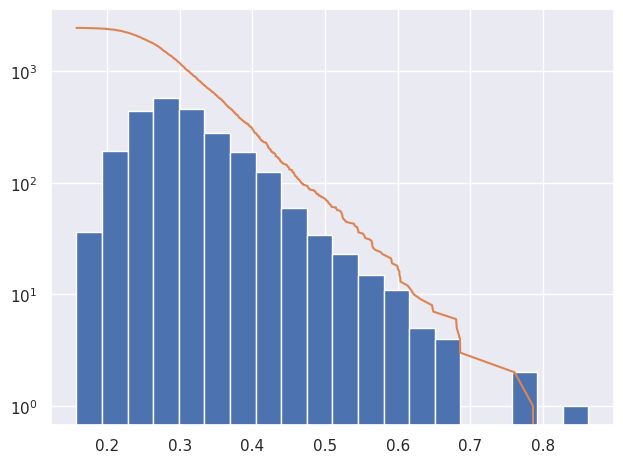

In [207]:
plt.hist(score, bins=20)
plt.plot(np.flip(np.sort(score)), np.linspace(0, len(df), len(df)))
plt.yscale("log")

In [208]:
from sklearn.manifold import Isomap

reducer = Isomap(n_neighbors=n_neighbors, p=10)
embedding = reducer.fit_transform(normalized_df)
print(embedding.shape)

/home/djanloo/.virtualenvs/DM2-PeqFRmfa/lib/python3.10/site-packages/sklearn/manifold/_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/home/djanloo/.virtualenvs/DM2-PeqFRmfa/lib/python3.10/site-packages/scipy/sparse/_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(2452, 2)


36


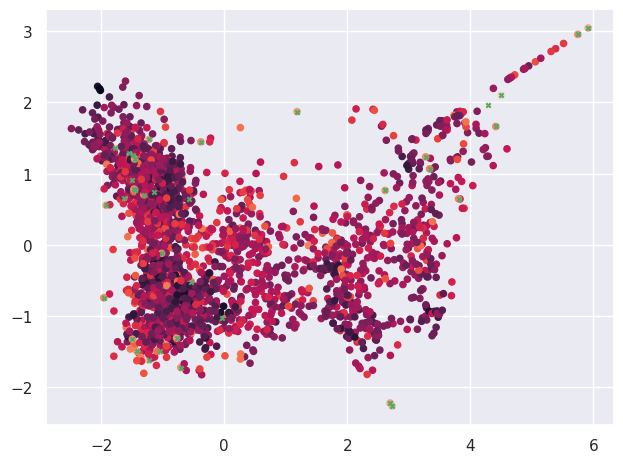

In [209]:
plt.scatter(*embedding.T, c=np.log10(score), s=20)
cutted = embedding[score > 0.55]
print(len(cutted))
plt.scatter(*cutted.T, marker="x", color="g", s=10)

<Axes: >

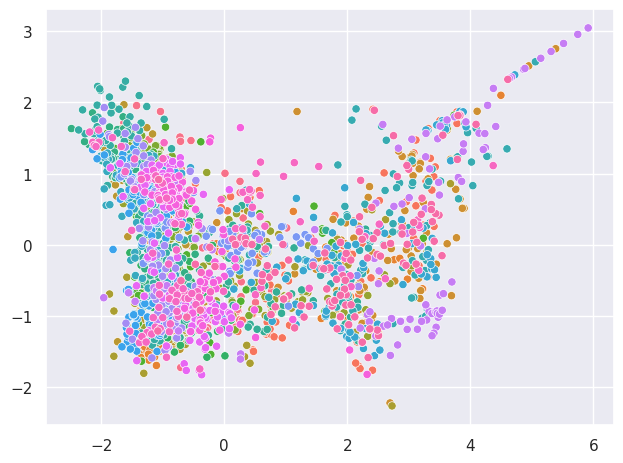

In [210]:
sns.scatterplot(x=embedding[:,0], y=embedding[:,1], hue=df["actor"], legend=False)

<Axes: >

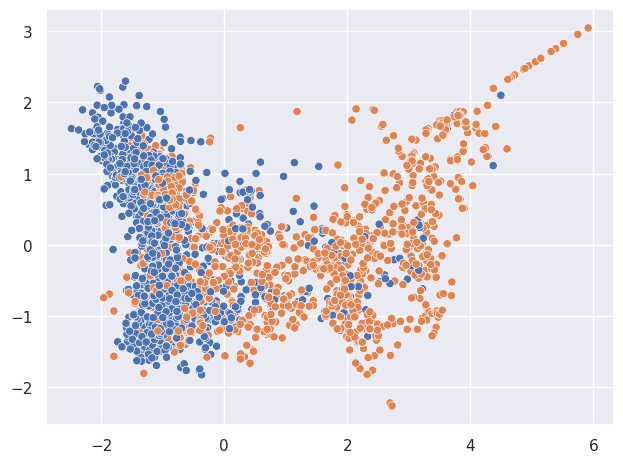

In [211]:
sns.scatterplot(x = embedding[:,0], y=embedding[:,1], hue=df["sex"], legend=False)

<Axes: >

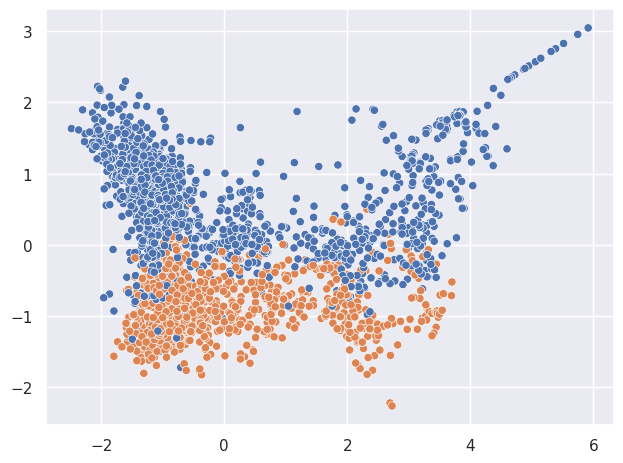

In [212]:
sns.scatterplot(x = embedding[:,0], y=embedding[:,1], hue=df["vocal_channel"], legend=False)

<Axes: >

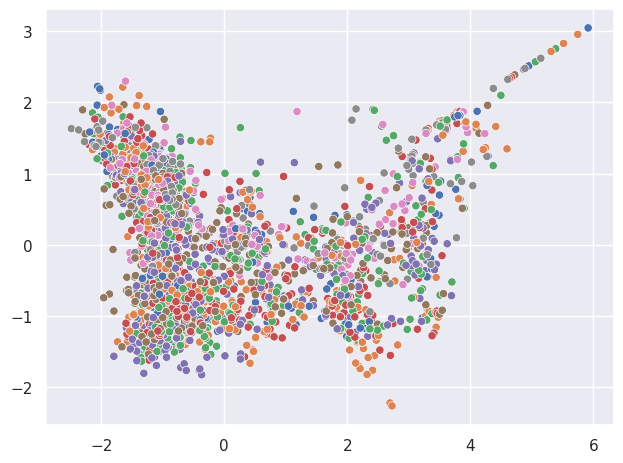

In [213]:
sns.scatterplot(x = embedding[:,0], y=embedding[:,1], hue=df["emotion"], legend=False)

## Isolation forest

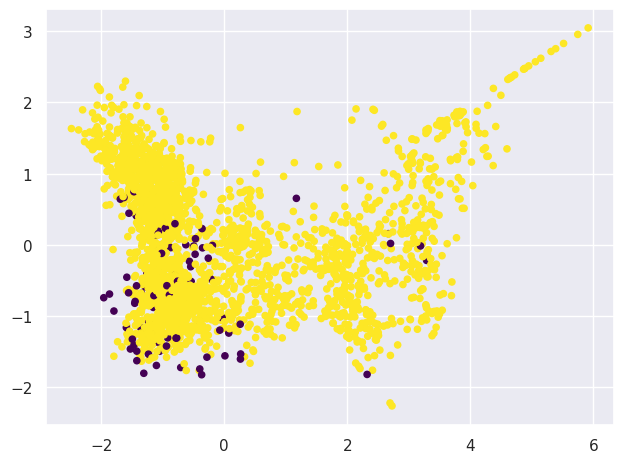

In [215]:
from sklearn.ensemble import IsolationForest
isfo = IsolationForest(max_samples= 500)
outliers = isfo.fit_predict(normalized_df.values)
plt.scatter(*embedding.T, c=outliers, s=20, cmap="viridis")
